# Assignment: Data Wrangling
## `! git clone https://github.com/DS3001/wrangling`
## Do Q2, and one of Q1 or Q3.

In [1]:
! git clone https://github.com/DS3001/wrangling


Cloning into 'wrangling'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 75 (delta 27), reused 10 (delta 10), pack-reused 41
Receiving objects: 100% (75/75), 6.25 MiB | 19.88 MiB/s, done.
Resolving deltas: 100% (33/33), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [63]:
import pandas as pd
import numpy as np


In [ ]:

# first mistake was not knowing my current directory to find the file
import os
os.getcwd()

# after figuring that out all that was needed was to do was remove the commas for the thousands and
# convert to numeric

df = pd.read_csv("./wrangling/assignment/data/airbnb_hw.csv")
var = 'Price'
df[var]=df[var].str.replace(',','')
df[var] = pd.to_numeric(df[var],errors= 'coerce')
# df[var].isnull()
# print(df[var].unique())
df.describe()


In [87]:


#sharks now
df = pd.read_csv("./wrangling/assignment/data/sharks.csv", low_memory=False)
df["Type"].unique()
var = "Type"

#all unknowns i put into a nan because they didnt tell us anything useful
df[var] = df[var].replace(["Unconfirmed","Invalid","Questionable","Under investigation","Unverified"], np.nan)

#all of the different water related attacks I put into Water Accident so it could cover all of them
df[var] = df[var].replace(['Sea Disaster', 'Boat','Boating','Boatomg', "Watercraft"],'Water Accident')
print(df[var].unique())
# for this one i decided to rename everything that I thought was in a similar catagory to the
# same thing to make it much easier to read
# I was very lucky that there were not to many types


['Unprovoked' 'Provoked' nan 'Water Accident']


In [88]:

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)





count    22986.000000
mean         0.845428
std          0.477276
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: WhetherDefendantWasReleasedPretrial, dtype: float64
1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64
1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64


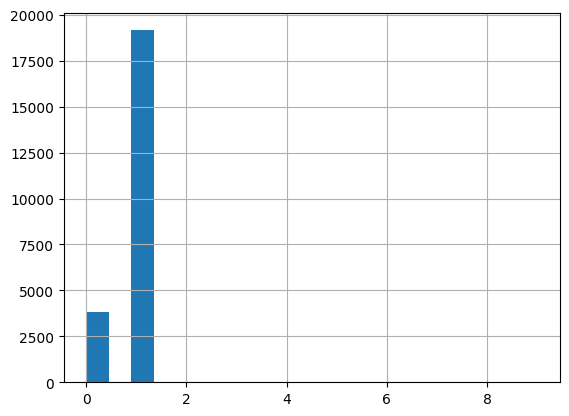

In [89]:
var = "WhetherDefendantWasReleasedPretrial"

print(df[var].describe())
print(df[var].value_counts())
#from the docs 9 was the unknown type
df[var] = df[var].replace(9,np.nan)
print(df[var].value_counts())


In [90]:

var = "ImposedSentenceAllChargeInContactEvent"
var2 ="SentenceTypeAllChargesAtConvictionInContactEvent"
print("ImposedSentenceAllChargeInContactEvent \n",df[var].value_counts())
print("SentenceTypeAllChargesAtConvictionInContactEvent \n",df[var2].value_counts())
#codes 4 and 9 both were dissmissed or none effectivly being 0
totalNA = df[var2].value_counts()[4]
totalNA += df[var2].value_counts()[9]
print("total NAs bc of SentenceTypeAllChargesAtConvictionInContactEvent" ,totalNA)
#I have chosed to treat these as 0 for the Imposed Scentence
df[var] = df[var].replace(' ',0)
df[var] = pd.to_numeric(df[var])
print("New value Counts \n",df[var].value_counts())


ImposedSentenceAllChargeInContactEvent 
                     9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: ImposedSentenceAllChargeInContactEvent, Length: 484, dtype: int64
SentenceTypeAllChargesAtConvictionInContactEvent 
 4    8779
0    8720
1    4299
2     914
9     274
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: int64
total NAs bc of SentenceTypeAllChargesAtConvictionInContactEvent 9053
New value Counts 
 0.000000     14006
12.000000     1404
0.985626      1051
6.000000       809
3.000000       787
             ...  
49.971253        1
57.034908        1
79.926078        1
42.164271        1
1.657084         1
Name: ImposedSentenceAllChargeInContactEvent, Length: 483, dtype: int64


**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. The most recent US census gathered data on race based on self identification. This allowed for people to report more than one race group.
2. We gather these types of data to see trends, underserved/overserved communities and to see where we should put our efforts. Quality data matters very much here because because it can affect societal notions and policy.
3. I think that for when they gather data on race it is difficult because people are multisided and come from very diverse ethnic backgrounds. This leads to dual or more answers or other catagories that make understanding the data/cleaning the hard to do. I think that because of this it is hard to see empricaly which groups people fit in so maybe it would be better to give a wide variety of catagories to pick from so that people could fill out their exact race.
4. One concern I have for potentially sensitive variables is peoples willingness to answer correctly. Whether it be because of societal norms or other reasons people sometimes have a hard time answering truthfully if they feel that their answer is somehow wrong or against the norm. Good practices that have been adopted is to make data gathering anon and by adding the prefer not to answer options. This does lead to some more missing data but I think that because the option is there people may feel more comfortable and answer more truthfully. I also think that we need to continue with the practice of adding more options to choose from in an effort to properly describe the answers correctly.

In [ ]:
! git